In [13]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

In [48]:
def fun(x, l):
    '''функция задает начальное положение'''
    return np.sin(x*np.pi/l)

def dfun(x, l):
    '''функция задает начальную скорость'''
    return 0



def most_fun(f, ff, nt, T, nx, l, omega):
    '''функция делает работу'''
    
    ht = T/nt
    hx = l/nx
    y = np.zeros((nt,nx))
    y_ = np.zeros(nx)
    theta = omega**2*ht/hx
    
    for n in range(nx):
        y[0,n] = f(n*hx, l)
        y_[n] = ff(n*hx, l)
    
    for n in range(1, nx-2):
        y[1,n] = y[0,n] - ht*y_[n] + theta**2/2 * (y[0,n+1] - 2*y[0,n]+y[0,n-1])
        
    y[1,0] = 0
    y[1,-1] = 0
    
    for i in range(1,nt-1):
        for n in range(1, nx-2):
            y[i+1,n] = 2*y[i,n] - y[i-1,n] + theta**2 * (y[i,n+1] - 2*y[i,n]+y[i,n-1])
        
        y[i+1,0] = 0
        y[i+1,-1] = 0
        
    return y

In [49]:
nt = 100
T = 2
nx = 100
l = 2
omega = 1

y = most_fun(fun, dfun, nt, T, nx, l, omega)

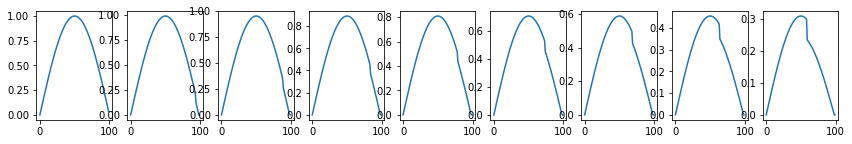

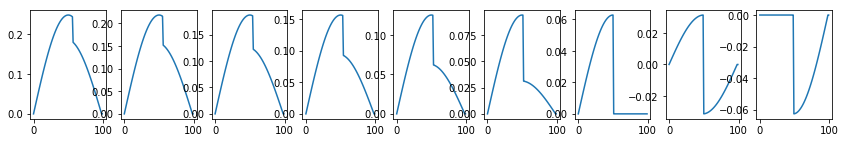

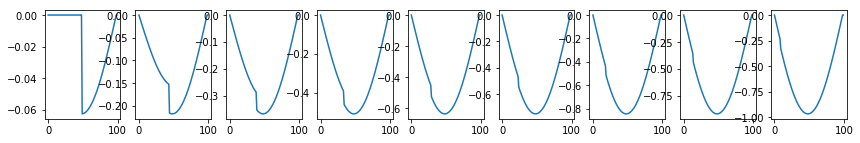

In [52]:
fig = plt.figure(figsize=plt.figaspect(0.1))
for i in range(1, 10):
    ax = fig.add_subplot(1, 10, i)
    ax.plot(y[5*(i-1),:])
    
fig = plt.figure(figsize=plt.figaspect(0.1))
for i in range(1, 10):
    ax = fig.add_subplot(1, 10, i)
    ax.plot(y[i+41,:])
    
fig = plt.figure(figsize=plt.figaspect(0.1))
for i in range(1, 10):
    ax = fig.add_subplot(1, 10, i)
    ax.plot(y[5*(i-1)+50,:])
    